## Bar plots
Bar plots are very common, so we need to learn how to make them. I would favour\
other plots over bar plots unless they are completely necessary.\
Replace _ to complete expressions and return the correct answer\
Restart R to remove previous results using: Ctrl/Cmd + shift + F10\
Remember - try to use google to help you answer questions\
Packages required
library(tidyverse)

In [1]:
library("tidyverse")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### 1. Barplots
#### 1.1 Import the data
fish-lengths.rds contains length measurements of fish captured from sites that differ\
by marine park protection category (Management) and whether there is urbanisation\
located near the site (Shore)

In [2]:
fish <-
  readr::read_rds("../data/fish-lengths.rds")

Examine the data

In [3]:
head(fish, n = 5)

,Management,Shore,Length
,<fct>,<fct>,<dbl>
1,Protected,Natural,10.4
2,Protected,Natural,2.0
3,Protected,Natural,3.0
4,Protected,Natural,7.3
5,Protected,Natural,9.2


We want to create a barplot with standard errors.\
Create a new dataset that is the statistical summary of lengths by Management and Shore.\
That is, summarise Length by Management and Shore\
Include the summaries:
- number of observations
- mean
- SD
- SE (SD / sqrt(n))

In [8]:
fish_summary <-
  fish |>
  group_by(Management, Shore) |>
  summarise(length_count = n(),
            length_mean = mean(Length),
            length_sd = sd(Length),
            length_se = length_sd / sqrt(length_count),
            .groups = "drop")
fish_summary

Management,Shore,length_count,length_mean,length_sd,length_se
<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>
Unprotected,Natural,20,10.265,7.652745,1.7112057
Unprotected,Urbanised,20,8.760,6.565973,1.4681962
Protected,Natural,20,6.645,4.212197,0.9418759
Protected,Urbanised,20,7.705,3.822988,0.8548461


#### 1.2 Create a barplot
Create a barplot of fish mean length by management and shore.\
You should have the x value = Management and colour the bars by Shore. We use the fill= for filling the bars with colour. Remember that bars will be stacked by default

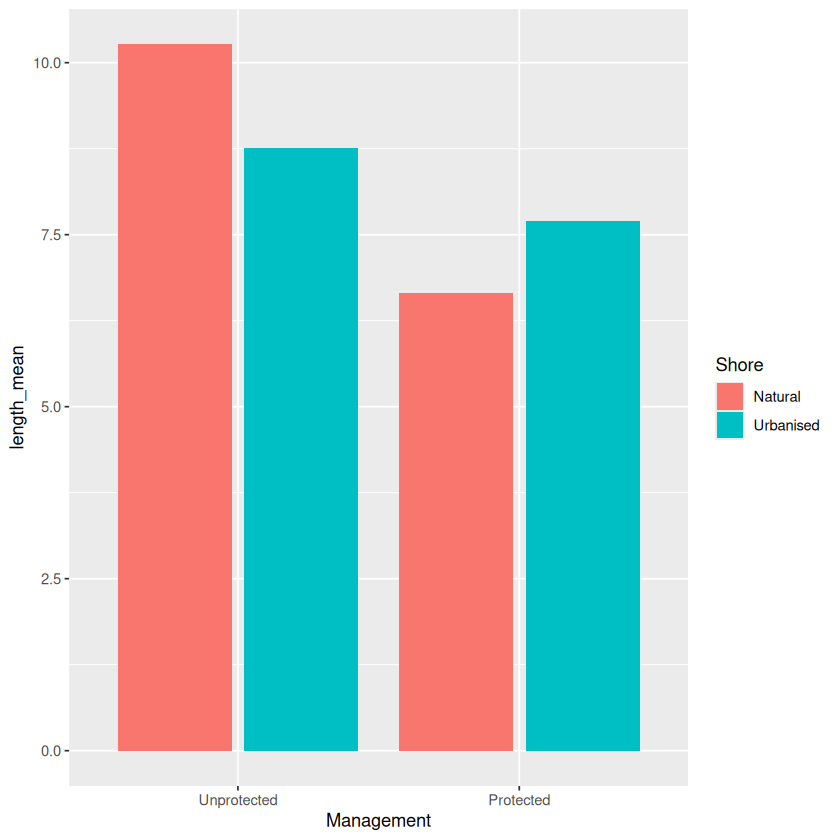

In [ ]:
fish_summary |>
  ggplot(aes(
             x = Management,
             y = length_mean,
             fill = Shore)) +
  geom_col(position = "dodge2")


#### 1.3 Add error bars
Add error bars by including a geom_errorbar.\
Alter the width values to see how they affect error bar width and position

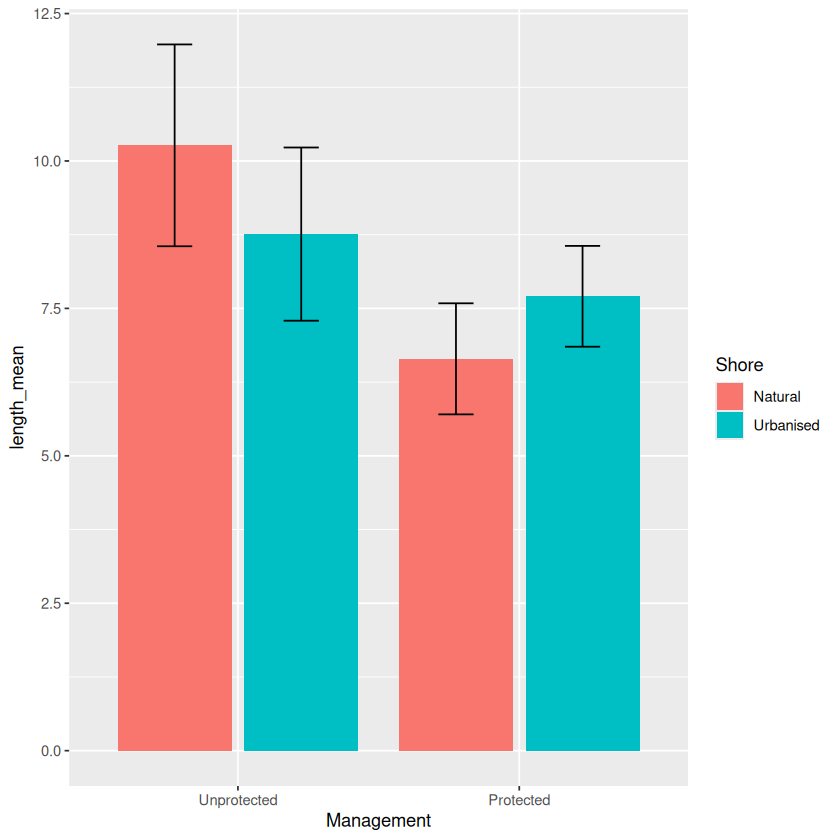

In [ ]:
fish_summary |>
  ggplot(aes(
             x = Management,
             y = length_mean,
             fill = Shore)) +
  geom_col(position = "dodge2") +
  geom_errorbar(aes(
                    ymin = length_mean - length_se,
                    ymax = length_mean + length_se),
  width = 0.25,
  position = position_dodge(width = 0.9))

#### 1.4 Change bar fill and line colour
1. Change the bar outline colour to black
2. Use scale_fill_manual() and provide a named vector to the values argument to change the bar fill colours to: Natural = 'white' and Urbanised = "grey50"


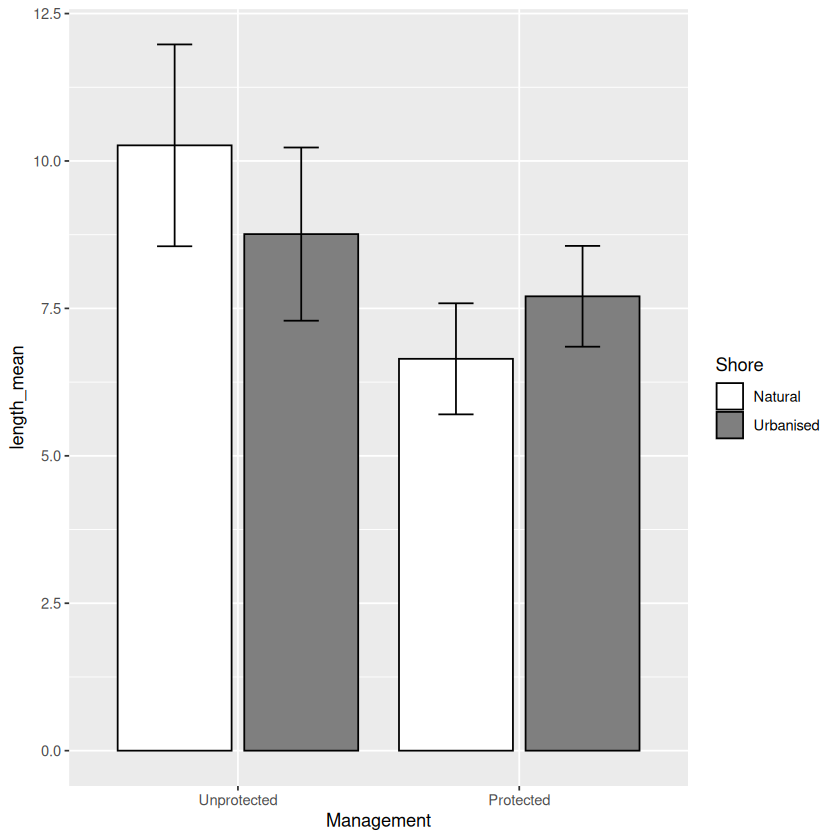

In [18]:
fish_summary |>
  ggplot(aes(
             x = Management,
             y = length_mean,
             fill = Shore)) +
  geom_col(
    position = "dodge2",
    color = "black") +
  geom_errorbar(aes(
                    ymin = length_mean - length_se,
                    ymax = length_mean + length_se),
  width = 0.25,
  position = position_dodge(width = 0.9)) +
  scale_fill_manual(
    values = list(Natural = "white", Urbanised = "grey50")
  )

#### 1.5 Export the plot
Export the plot to the outputs folder.

In [19]:
ggsave(filename = "../outputs/fish_lengths.png")

Saving 7 x 7 in image


---
## 2.0 Extra exercises
 Import the covid.csv, and plot the monthly number of cases for Spain using 
 a barplot. This is an "epidemic-curve"
 Can you identify periods of outbreak?


In [42]:
covid <-
  readr::read_csv("../data/covid.csv", show_col_types = FALSE)
head(covid, n = 3)

dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,continentExp
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>
2022-10-23,23,10,2022,3557,0,Austria,AT,AUT,8901064,Europe
2022-10-22,22,10,2022,5494,4,Austria,AT,AUT,8901064,Europe
2022-10-21,21,10,2022,7776,4,Austria,AT,AUT,8901064,Europe


In [40]:
covid_summary <- covid |>
  group_by(year, month) |>
  summarise(
            count = n(),
            .groups = "drop") |>
  mutate(year_month = paste(year, month, sep = "_"))
head(covid_summary, n = 30)

year,month,count,year_month
<dbl>,<dbl>,<int>,<chr>
2020,1,81,2020_1
2020,2,242,2020_2
2020,3,884,2020_3
2020,4,900,2020_4
2020,5,930,2020_5
2020,6,900,2020_6
2020,7,930,2020_7
2020,8,930,2020_8
2020,9,900,2020_9


In [ ]:
covid_summary |>
  ggplot(aes(x = year)) +
  geom_histogram()

ERROR while rich displaying an object: Error in `geom_histogram()`:
! Problem while computing stat.
ℹ Error occurred in the 1st layer.
Caused by error in `setup_params()`:
! `stat_bin()` requires a continuous x aesthetic.
✖ the x aesthetic is discrete.
ℹ Perhaps you want `stat="count"`?

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimety

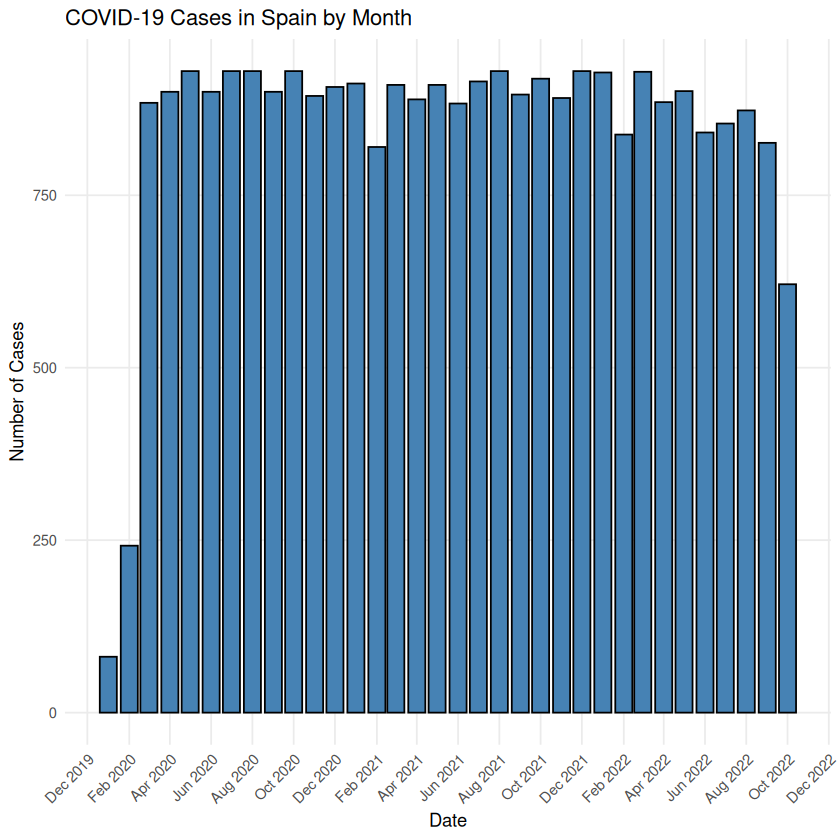

In [39]:
# First, let's create a better summary of the COVID data
covid_summary <- covid |>
  group_by(year, month) |>
  summarise(
    total_cases = n(),              # Count cases per month
    .groups = "drop"
  ) |>
  mutate(
    date = as.Date(paste(year, month, "01", sep = "-"))  # Create proper date column
  )

# Now create the epidemic curve
covid_summary |>
  ggplot(aes(x = date, y = total_cases)) +
  geom_col(fill = "steelblue", color = "black") +
  labs(
    title = "COVID-19 Cases in Spain by Month",
    x = "Date",
    y = "Number of Cases"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),  # Rotate date labels
    panel.grid.minor = element_blank()                   # Remove minor gridlines
  ) +
  scale_x_date(date_breaks = "2 months", date_labels = "%b %Y")  # Format date axis

---
## Conclusion
We examined
- making barplots
- including aesthetics
- adding error bars
- changing colours